## Initial Setup and Loading Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

weekly_flow_input = r"C:\Users\athen\Documents\GitHub\TCD_Dissertation\archive\background_info\avg_weeklyflow_passengers.csv"
hourly_percentage_input = r"C:\Users\athen\Documents\GitHub\TCD_Dissertation\archive\background_info\daily_percentage_hourandline.csv"
luas_infrastructure_input = r"C:\Users\athen\Documents\GitHub\TCD_Dissertation\archive\background_info\luas_infrastructure.csv"
passenger_journey_input = r"C:\Users\athen\Documents\GitHub\TCD_Dissertation\archive\background_info\passenger_journeys.csv"
monthly_passengers_input = r"C:\Users\athen\Documents\GitHub\TCD_Dissertation\archive\background_info\passenger_numbers.csv"


weekly_flow = pd.read_csv(weekly_flow_input)
hourly_pct = pd.read_csv(hourly_percentage_input)
infra = pd.read_csv(luas_infrastructure_input)
journeys = pd.read_csv(passenger_journey_input)
monthly_passengers = pd.read_csv(monthly_passengers_input)

# Weekly Passenger Load
This plot shows fluctuations in weekly passenger volume on the Red and Green LUAS lines. Peaks may reflect seasonality, holidays, or city events. Consistent dips on certain weeks may point to reduced service or low-demand periods. The Lockdown period isgreatly visualized alongw ith the return to work from office.

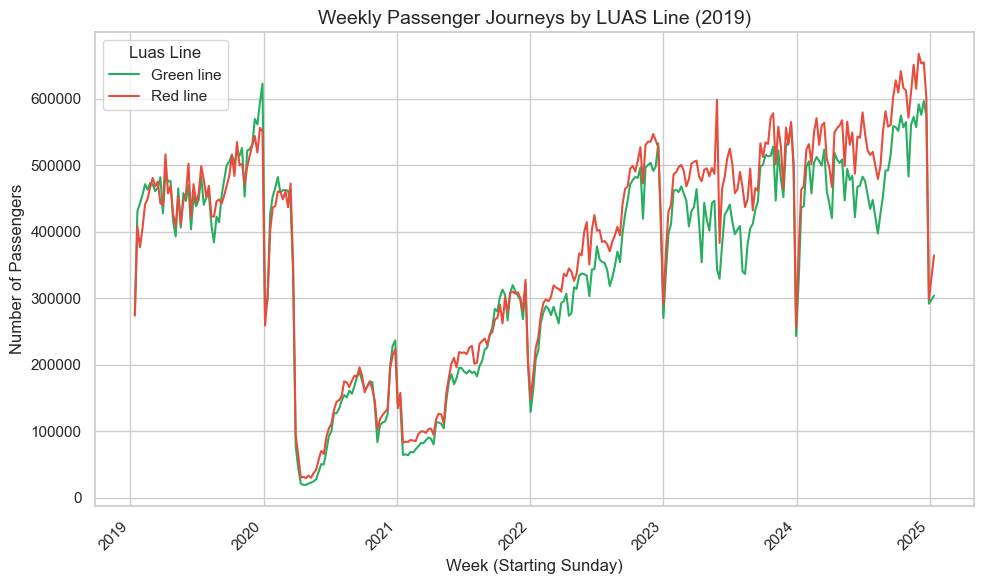

In [4]:
journeys["Week"] = pd.to_datetime(journeys["TLIST(W1)"] + "0", format="%YW%W%w", errors='coerce')
journey_lines = journeys[journeys["Luas Line"].isin(["Red line", "Green line"])]
pivoted = journey_lines.pivot_table(index="Week", columns="Luas Line", values="VALUE", aggfunc="sum")

#plot
available_lines = pivoted.columns.tolist()
color_map = {"Red line": "#e74c3c", "Green line": "#27ae60"}

pivoted.plot(color=[color_map.get(col, "gray") for col in available_lines])
plt.title("Weekly Passenger Journeys by LUAS Line (2019)", fontsize=14)
plt.ylabel("Number of Passengers", fontsize=12)
plt.xlabel("Week (Starting Sunday)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Daily Passenger Load
Passenger flow peaks on weekdays, especially Tuesday–Thursday, consistent with workday commuting. Lower usage on weekends suggests reduced leisure or optional travel. The Green Line generally carries more passengers than the Red Line on each day.

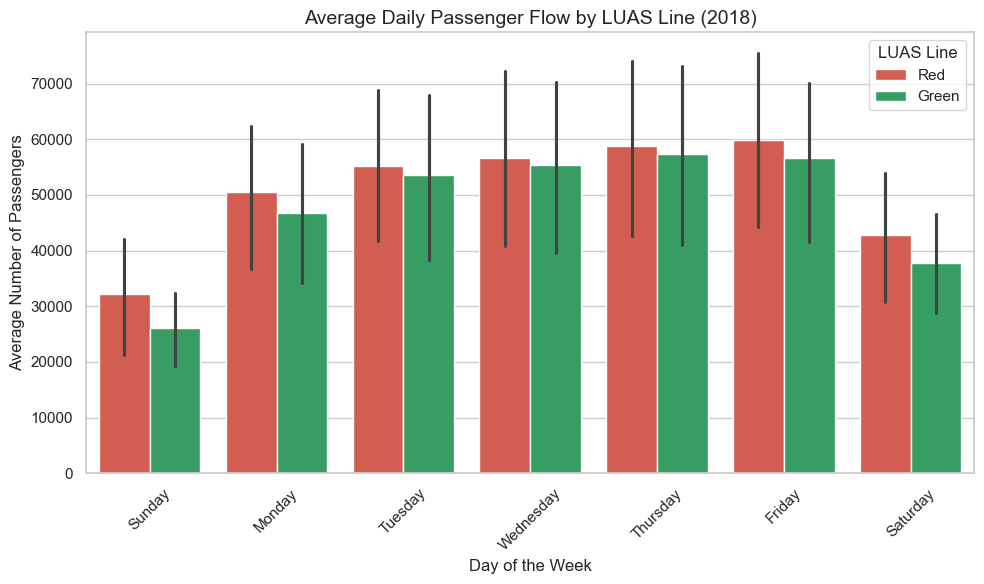

In [5]:
daily_flow = weekly_flow[
    weekly_flow["Statistic Label"].isin(["Average Red Line Flow", "Average Green Line Flow"])
]
daily_flow = daily_flow[daily_flow["Days of Week"] != "All days"]
daily_flow["Line"] = daily_flow["Statistic Label"].str.extract(r"Average (\w+) Line")

#plot
custom_colors = {"Red": "#e74c3c", "Green": "#27ae60"}

sns.barplot(
    data=daily_flow,
    x="Days of Week",
    y="VALUE",
    hue="Line",
    palette=custom_colors
)
plt.title("Average Daily Passenger Flow by LUAS Line (2018)", fontsize=14)
plt.ylabel("Average Number of Passengers", fontsize=12)
plt.xlabel("Day of the Week", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="LUAS Line")
plt.tight_layout()
plt.show()

# Hourly Passenger Load
 Morning (7–9am) and evening (4–6pm) peaks suggest classic commute patterns. Passenger activity is very low before 6am and after 9pm.

C:\Users\athen\AppData\Local\Temp\ipykernel_12160\404522664.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_filtered["Luas Line"] = hourly_filtered["Luas Line"].str.replace(" line", "").str.capitalize()


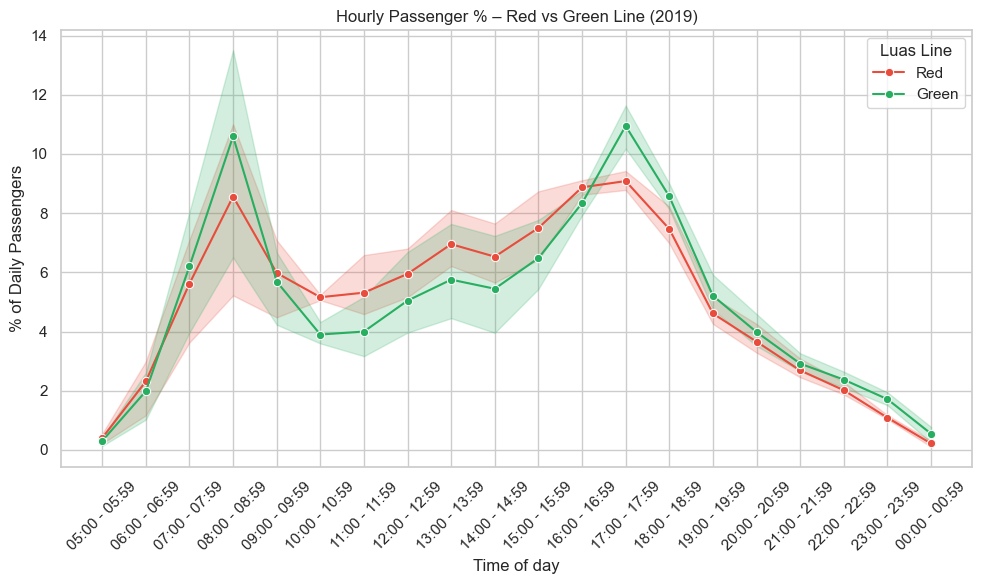

In [6]:
hourly_filtered = hourly_pct[hourly_pct["Luas Line"].isin(["Red line", "Green line"])]

# Standardize line names
hourly_filtered["Luas Line"] = hourly_filtered["Luas Line"].str.replace(" line", "").str.capitalize()

# Line plot with red/green
palette_hourly = {"Red": "#e74c3c", "Green": "#27ae60"}
plt.figure()
sns.lineplot(data=hourly_filtered, x="Time of day", y="VALUE", hue="Luas Line", palette=palette_hourly, marker="o")
plt.title("Hourly Passenger % – Red vs Green Line (2019)")
plt.ylabel("% of Daily Passengers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly Passenger Trends
Seasonal trends are visible—e.g. dips around winter, peaks in summer.

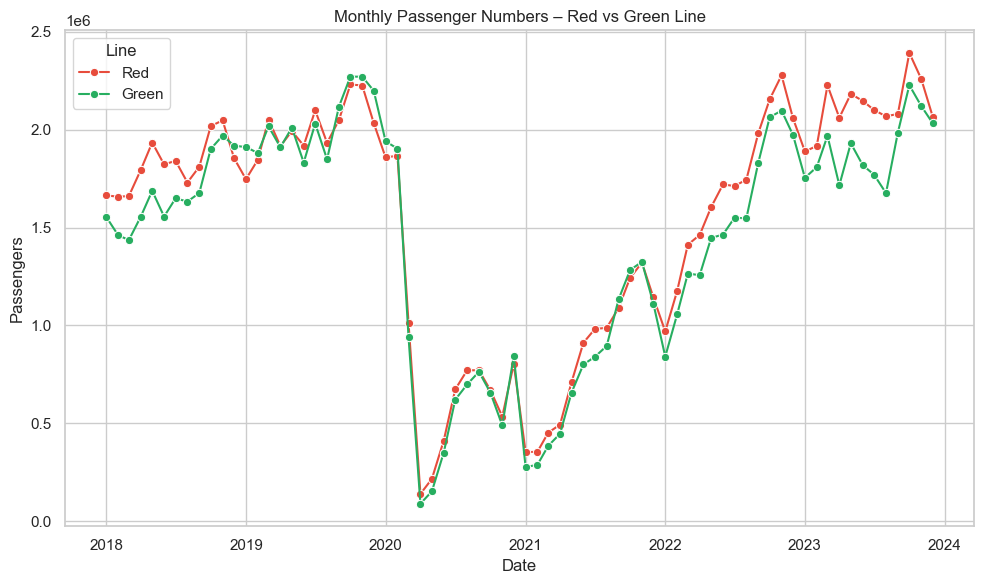

In [7]:
# Recreate 'Date' column properly and inspect
monthly_passengers["Date"] = pd.to_datetime(
    monthly_passengers["Year"].astype(str) + "-" + monthly_passengers["Month"].astype(str) + "-01",
    errors='coerce'
)

# Extract line (Red or Green) from 'Statistic Label'
monthly_passengers["Line"] = monthly_passengers["Statistic Label"].str.extract(r"(Red|Green)", expand=False)

# Drop rows with missing values in either 'Date' or 'Line'
monthly_clean = monthly_passengers.dropna(subset=["Date", "Line", "VALUE"])

# Plot monthly trends
palette_monthly = {"Red": "#e74c3c", "Green": "#27ae60"}
plt.figure()
sns.lineplot(data=monthly_clean, x="Date", y="VALUE", hue="Line", palette=palette_monthly, marker="o")
plt.title("Monthly Passenger Numbers – Red vs Green Line")
plt.ylabel("Passengers")
plt.xlabel("Date")
plt.tight_layout()
plt.show()


